In [1]:
import logging

import probtorch
import torch

import combinators
import foldable
import importance
import mcmc
import ssm
import utils

In [2]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [3]:
mu = torch.zeros(1)
sigma = torch.ones(1) / 2
delta = torch.ones(1)
zs = torch.ones(50+1) * -1
zs[0] = 0.0

In [4]:
ssm_initializer = combinators.Deterministic(zs[0], mu, sigma, delta, batch_shape=tuple())
ssm_step = foldable.Foldable(ssm.SsmStep(batch_shape=tuple()), initializer=ssm_initializer)
ssm_sequence = foldable.Reduce(ssm_step, generator=lambda: range(zs.shape[0]-1))

In [5]:
_, generative, _ = ssm_sequence()

In [6]:
data = {k: v.value for k, v in generative.variables() if 'X_' in k}

In [7]:
particle_shape = (100,)

In [8]:
ssm_params = {
    'mu': {
        'loc': torch.tensor(0.),
        'scale': torch.tensor(1.),
    },
    'sigma': {
        'loc': torch.tensor(1.),
        'scale': torch.tensor(1.),
    },
    'delta': {
        'loc': torch.tensor(1.),
        'scale': torch.tensor(1.),
    }
}

In [9]:
init_ssm_generative = ssm.InitSsm(params=ssm_params, trainable=False, batch_shape=particle_shape)
init_ssm_proposal = ssm.InitSsm(params=ssm_params, trainable=True, batch_shape=particle_shape)
init_ssm_training = combinators.GuidedConditioning(init_ssm_generative, init_ssm_proposal)

In [10]:
ssm_step_training = foldable.Foldable(ssm.SsmStep(batch_shape=particle_shape), initializer=init_ssm_training)
ssm_training = foldable.Reduce(ssm_step_training, lambda: range(50))

In [11]:
inference, init_ssm_params, elbos = importance.variational_importance(
    ssm_training, 2000, data, use_cuda=False,
    lr=1e-2, patience=100
)

02/10/2019 23:16:06 ELBO=-5.62624268e+02 at epoch 1
02/10/2019 23:16:07 ELBO=-3.35538605e+02 at epoch 2
02/10/2019 23:16:07 ELBO=-2.04231781e+02 at epoch 3
02/10/2019 23:16:07 ELBO=-5.63085327e+02 at epoch 4
02/10/2019 23:16:07 ELBO=-3.14691956e+02 at epoch 5
02/10/2019 23:16:07 ELBO=-2.88330994e+02 at epoch 6
02/10/2019 23:16:07 ELBO=-1.70625504e+02 at epoch 7
02/10/2019 23:16:07 ELBO=-2.02573013e+02 at epoch 8
02/10/2019 23:16:07 ELBO=-2.42788162e+02 at epoch 9
02/10/2019 23:16:07 ELBO=-1.81782135e+02 at epoch 10
02/10/2019 23:16:07 ELBO=-7.26597961e+02 at epoch 11
02/10/2019 23:16:07 ELBO=-4.91194946e+02 at epoch 12
02/10/2019 23:16:07 ELBO=-3.20331573e+02 at epoch 13
02/10/2019 23:16:07 ELBO=-4.10714233e+02 at epoch 14
02/10/2019 23:16:07 ELBO=-3.02591583e+02 at epoch 15
02/10/2019 23:16:07 ELBO=-1.93675827e+02 at epoch 16
02/10/2019 23:16:07 ELBO=-4.35515686e+02 at epoch 17
02/10/2019 23:16:07 ELBO=-4.24063995e+02 at epoch 18
02/10/2019 23:16:07 ELBO=-2.72395294e+02 at epoch 19
02

Epoch   219: reducing learning rate of group 0 to 5.0000e-03.


02/10/2019 23:16:18 ELBO=-3.38546692e+02 at epoch 225
02/10/2019 23:16:18 ELBO=-3.32297821e+02 at epoch 226
02/10/2019 23:16:19 ELBO=-2.33990311e+02 at epoch 227
02/10/2019 23:16:19 ELBO=-2.72763000e+02 at epoch 228
02/10/2019 23:16:19 ELBO=-2.53838943e+02 at epoch 229
02/10/2019 23:16:19 ELBO=-1.60294052e+02 at epoch 230
02/10/2019 23:16:19 ELBO=-1.75558029e+02 at epoch 231
02/10/2019 23:16:19 ELBO=-2.23568726e+02 at epoch 232
02/10/2019 23:16:19 ELBO=-2.43138184e+02 at epoch 233
02/10/2019 23:16:19 ELBO=-2.96233246e+02 at epoch 234
02/10/2019 23:16:19 ELBO=-1.59586609e+02 at epoch 235
02/10/2019 23:16:19 ELBO=-2.04325623e+02 at epoch 236
02/10/2019 23:16:19 ELBO=-1.77427963e+02 at epoch 237
02/10/2019 23:16:19 ELBO=-2.00499649e+02 at epoch 238
02/10/2019 23:16:19 ELBO=-2.91535553e+02 at epoch 239
02/10/2019 23:16:19 ELBO=-1.51419525e+02 at epoch 240
02/10/2019 23:16:19 ELBO=-2.09760864e+02 at epoch 241
02/10/2019 23:16:19 ELBO=-2.55961777e+02 at epoch 242
02/10/2019 23:16:19 ELBO=-1.

Epoch   320: reducing learning rate of group 0 to 2.5000e-03.


02/10/2019 23:16:25 ELBO=-1.90850220e+02 at epoch 324
02/10/2019 23:16:25 ELBO=-1.04139839e+02 at epoch 325
02/10/2019 23:16:25 ELBO=-3.23456421e+02 at epoch 326
02/10/2019 23:16:25 ELBO=-1.69619537e+02 at epoch 327
02/10/2019 23:16:25 ELBO=-2.34836121e+02 at epoch 328
02/10/2019 23:16:25 ELBO=-1.31267944e+02 at epoch 329
02/10/2019 23:16:25 ELBO=-2.48062790e+02 at epoch 330
02/10/2019 23:16:25 ELBO=-2.65705261e+02 at epoch 331
02/10/2019 23:16:25 ELBO=-2.31229523e+02 at epoch 332
02/10/2019 23:16:25 ELBO=-2.17123550e+02 at epoch 333
02/10/2019 23:16:26 ELBO=-2.33484085e+02 at epoch 334
02/10/2019 23:16:26 ELBO=-2.84903717e+02 at epoch 335
02/10/2019 23:16:26 ELBO=-3.06667358e+02 at epoch 336
02/10/2019 23:16:26 ELBO=-1.58355972e+02 at epoch 337
02/10/2019 23:16:26 ELBO=-1.28271683e+02 at epoch 338
02/10/2019 23:16:26 ELBO=-1.38806686e+02 at epoch 339
02/10/2019 23:16:26 ELBO=-3.35509827e+02 at epoch 340
02/10/2019 23:16:26 ELBO=-1.74306641e+02 at epoch 341
02/10/2019 23:16:26 ELBO=-1.

Epoch   425: reducing learning rate of group 0 to 1.2500e-03.


02/10/2019 23:16:32 ELBO=-2.41514771e+02 at epoch 430
02/10/2019 23:16:32 ELBO=-2.09703186e+02 at epoch 431
02/10/2019 23:16:32 ELBO=-2.95263336e+02 at epoch 432
02/10/2019 23:16:32 ELBO=-3.04499268e+02 at epoch 433
02/10/2019 23:16:32 ELBO=-3.13094849e+02 at epoch 434
02/10/2019 23:16:32 ELBO=-2.20856461e+02 at epoch 435
02/10/2019 23:16:32 ELBO=-1.64518082e+02 at epoch 436
02/10/2019 23:16:32 ELBO=-2.61195801e+02 at epoch 437
02/10/2019 23:16:32 ELBO=-2.81752991e+02 at epoch 438
02/10/2019 23:16:32 ELBO=-2.06445450e+02 at epoch 439
02/10/2019 23:16:32 ELBO=-2.59892029e+02 at epoch 440
02/10/2019 23:16:32 ELBO=-2.48744080e+02 at epoch 441
02/10/2019 23:16:32 ELBO=-2.33884598e+02 at epoch 442
02/10/2019 23:16:32 ELBO=-2.70246979e+02 at epoch 443
02/10/2019 23:16:32 ELBO=-2.13397766e+02 at epoch 444
02/10/2019 23:16:32 ELBO=-2.38028595e+02 at epoch 445
02/10/2019 23:16:33 ELBO=-1.38218552e+02 at epoch 446
02/10/2019 23:16:33 ELBO=-2.59905945e+02 at epoch 447
02/10/2019 23:16:33 ELBO=-3.

Epoch   526: reducing learning rate of group 0 to 6.2500e-04.


02/10/2019 23:16:38 ELBO=-2.59925629e+02 at epoch 531
02/10/2019 23:16:38 ELBO=-2.21912247e+02 at epoch 532
02/10/2019 23:16:38 ELBO=-1.36206039e+02 at epoch 533
02/10/2019 23:16:38 ELBO=-3.25691956e+02 at epoch 534
02/10/2019 23:16:38 ELBO=-2.66788666e+02 at epoch 535
02/10/2019 23:16:38 ELBO=-2.87279602e+02 at epoch 536
02/10/2019 23:16:38 ELBO=-2.00838165e+02 at epoch 537
02/10/2019 23:16:38 ELBO=-1.23585686e+02 at epoch 538
02/10/2019 23:16:38 ELBO=-2.39555923e+02 at epoch 539
02/10/2019 23:16:38 ELBO=-1.98001038e+02 at epoch 540
02/10/2019 23:16:39 ELBO=-3.33222076e+02 at epoch 541
02/10/2019 23:16:39 ELBO=-2.25129944e+02 at epoch 542
02/10/2019 23:16:39 ELBO=-1.55974457e+02 at epoch 543
02/10/2019 23:16:39 ELBO=-2.58515961e+02 at epoch 544
02/10/2019 23:16:39 ELBO=-2.21567520e+02 at epoch 545
02/10/2019 23:16:39 ELBO=-2.22515121e+02 at epoch 546
02/10/2019 23:16:39 ELBO=-1.57568329e+02 at epoch 547
02/10/2019 23:16:39 ELBO=-1.34070847e+02 at epoch 548
02/10/2019 23:16:39 ELBO=-2.

Epoch   627: reducing learning rate of group 0 to 3.1250e-04.


02/10/2019 23:16:43 ELBO=-2.27336731e+02 at epoch 631
02/10/2019 23:16:44 ELBO=-2.84470123e+02 at epoch 632
02/10/2019 23:16:44 ELBO=-2.42388794e+02 at epoch 633
02/10/2019 23:16:44 ELBO=-2.70937164e+02 at epoch 634
02/10/2019 23:16:44 ELBO=-2.76180664e+02 at epoch 635
02/10/2019 23:16:44 ELBO=-4.40748993e+02 at epoch 636
02/10/2019 23:16:44 ELBO=-1.98960327e+02 at epoch 637
02/10/2019 23:16:44 ELBO=-2.06807617e+02 at epoch 638
02/10/2019 23:16:44 ELBO=-2.29230042e+02 at epoch 639
02/10/2019 23:16:44 ELBO=-2.43180710e+02 at epoch 640
02/10/2019 23:16:44 ELBO=-1.70906631e+02 at epoch 641
02/10/2019 23:16:44 ELBO=-1.93838669e+02 at epoch 642
02/10/2019 23:16:44 ELBO=-3.19445221e+02 at epoch 643
02/10/2019 23:16:44 ELBO=-2.41116714e+02 at epoch 644
02/10/2019 23:16:44 ELBO=-2.15400589e+02 at epoch 645
02/10/2019 23:16:44 ELBO=-1.54032532e+02 at epoch 646
02/10/2019 23:16:45 ELBO=-2.37478088e+02 at epoch 647
02/10/2019 23:16:45 ELBO=-2.05731201e+02 at epoch 648
02/10/2019 23:16:45 ELBO=-3.

Epoch   728: reducing learning rate of group 0 to 1.5625e-04.


02/10/2019 23:16:51 ELBO=-3.60732422e+02 at epoch 733
02/10/2019 23:16:51 ELBO=-1.84557556e+02 at epoch 734
02/10/2019 23:16:51 ELBO=-2.39992996e+02 at epoch 735
02/10/2019 23:16:51 ELBO=-3.17523376e+02 at epoch 736
02/10/2019 23:16:51 ELBO=-2.15240143e+02 at epoch 737
02/10/2019 23:16:51 ELBO=-2.08419403e+02 at epoch 738
02/10/2019 23:16:51 ELBO=-2.32451385e+02 at epoch 739
02/10/2019 23:16:51 ELBO=-1.99910126e+02 at epoch 740
02/10/2019 23:16:51 ELBO=-2.20442825e+02 at epoch 741
02/10/2019 23:16:51 ELBO=-1.42620407e+02 at epoch 742
02/10/2019 23:16:51 ELBO=-2.22308167e+02 at epoch 743
02/10/2019 23:16:51 ELBO=-1.58218140e+02 at epoch 744
02/10/2019 23:16:52 ELBO=-1.97387405e+02 at epoch 745
02/10/2019 23:16:52 ELBO=-2.04443314e+02 at epoch 746
02/10/2019 23:16:52 ELBO=-2.62066559e+02 at epoch 747
02/10/2019 23:16:52 ELBO=-1.91714294e+02 at epoch 748
02/10/2019 23:16:52 ELBO=-1.67107224e+02 at epoch 749
02/10/2019 23:16:52 ELBO=-2.42765442e+02 at epoch 750
02/10/2019 23:16:52 ELBO=-2.

Epoch   896: reducing learning rate of group 0 to 7.8125e-05.


02/10/2019 23:17:02 ELBO=-2.37890945e+02 at epoch 900
02/10/2019 23:17:02 ELBO=-1.56276901e+02 at epoch 901
02/10/2019 23:17:02 ELBO=-1.99264877e+02 at epoch 902
02/10/2019 23:17:02 ELBO=-2.06672760e+02 at epoch 903
02/10/2019 23:17:03 ELBO=-2.47308868e+02 at epoch 904
02/10/2019 23:17:03 ELBO=-2.18622650e+02 at epoch 905
02/10/2019 23:17:03 ELBO=-2.98501221e+02 at epoch 906
02/10/2019 23:17:03 ELBO=-1.37815582e+02 at epoch 907
02/10/2019 23:17:03 ELBO=-2.23274429e+02 at epoch 908
02/10/2019 23:17:03 ELBO=-1.83600327e+02 at epoch 909
02/10/2019 23:17:03 ELBO=-1.75390900e+02 at epoch 910
02/10/2019 23:17:03 ELBO=-2.16763916e+02 at epoch 911
02/10/2019 23:17:03 ELBO=-3.15853729e+02 at epoch 912
02/10/2019 23:17:03 ELBO=-2.39107956e+02 at epoch 913
02/10/2019 23:17:03 ELBO=-1.73093628e+02 at epoch 914
02/10/2019 23:17:04 ELBO=-2.89588867e+02 at epoch 915
02/10/2019 23:17:04 ELBO=-1.84462021e+02 at epoch 916
02/10/2019 23:17:04 ELBO=-5.16796997e+02 at epoch 917
02/10/2019 23:17:04 ELBO=-1.

Epoch   997: reducing learning rate of group 0 to 3.9063e-05.


02/10/2019 23:17:12 ELBO=-2.75143463e+02 at epoch 1000
02/10/2019 23:17:12 ELBO=-2.77275391e+02 at epoch 1001
02/10/2019 23:17:12 ELBO=-1.97592529e+02 at epoch 1002
02/10/2019 23:17:13 ELBO=-2.63245117e+02 at epoch 1003
02/10/2019 23:17:13 ELBO=-1.66678299e+02 at epoch 1004
02/10/2019 23:17:13 ELBO=-3.10014679e+02 at epoch 1005
02/10/2019 23:17:13 ELBO=-1.92042419e+02 at epoch 1006
02/10/2019 23:17:13 ELBO=-2.76866821e+02 at epoch 1007
02/10/2019 23:17:13 ELBO=-1.51448502e+02 at epoch 1008
02/10/2019 23:17:13 ELBO=-2.14323135e+02 at epoch 1009
02/10/2019 23:17:13 ELBO=-1.91904831e+02 at epoch 1010
02/10/2019 23:17:13 ELBO=-2.78028229e+02 at epoch 1011
02/10/2019 23:17:13 ELBO=-3.65930359e+02 at epoch 1012
02/10/2019 23:17:14 ELBO=-1.72347961e+02 at epoch 1013
02/10/2019 23:17:14 ELBO=-2.19009521e+02 at epoch 1014
02/10/2019 23:17:14 ELBO=-2.21394974e+02 at epoch 1015
02/10/2019 23:17:14 ELBO=-2.24224457e+02 at epoch 1016
02/10/2019 23:17:14 ELBO=-2.82497498e+02 at epoch 1017
02/10/2019

Epoch  1098: reducing learning rate of group 0 to 1.9531e-05.


02/10/2019 23:17:21 ELBO=-3.33301331e+02 at epoch 1102
02/10/2019 23:17:21 ELBO=-2.81249512e+02 at epoch 1103
02/10/2019 23:17:21 ELBO=-2.32757355e+02 at epoch 1104
02/10/2019 23:17:21 ELBO=-2.14594666e+02 at epoch 1105
02/10/2019 23:17:21 ELBO=-2.27554321e+02 at epoch 1106
02/10/2019 23:17:21 ELBO=-3.43473175e+02 at epoch 1107
02/10/2019 23:17:21 ELBO=-3.48463776e+02 at epoch 1108
02/10/2019 23:17:22 ELBO=-3.52523987e+02 at epoch 1109
02/10/2019 23:17:22 ELBO=-2.53150726e+02 at epoch 1110
02/10/2019 23:17:22 ELBO=-4.11291901e+02 at epoch 1111
02/10/2019 23:17:22 ELBO=-1.70296646e+02 at epoch 1112
02/10/2019 23:17:22 ELBO=-1.97876389e+02 at epoch 1113
02/10/2019 23:17:22 ELBO=-1.79660156e+02 at epoch 1114
02/10/2019 23:17:22 ELBO=-2.15040848e+02 at epoch 1115
02/10/2019 23:17:22 ELBO=-1.59811066e+02 at epoch 1116
02/10/2019 23:17:22 ELBO=-2.30446365e+02 at epoch 1117
02/10/2019 23:17:22 ELBO=-2.03978149e+02 at epoch 1118
02/10/2019 23:17:22 ELBO=-2.61517517e+02 at epoch 1119
02/10/2019

Epoch  1199: reducing learning rate of group 0 to 9.7656e-06.


02/10/2019 23:17:27 ELBO=-2.18298080e+02 at epoch 1204
02/10/2019 23:17:27 ELBO=-2.90792206e+02 at epoch 1205
02/10/2019 23:17:27 ELBO=-2.77842499e+02 at epoch 1206
02/10/2019 23:17:27 ELBO=-2.45222382e+02 at epoch 1207
02/10/2019 23:17:27 ELBO=-1.73124146e+02 at epoch 1208
02/10/2019 23:17:27 ELBO=-1.56408478e+02 at epoch 1209
02/10/2019 23:17:27 ELBO=-2.91096680e+02 at epoch 1210
02/10/2019 23:17:27 ELBO=-1.78721939e+02 at epoch 1211
02/10/2019 23:17:28 ELBO=-3.04192047e+02 at epoch 1212
02/10/2019 23:17:28 ELBO=-2.38793427e+02 at epoch 1213
02/10/2019 23:17:28 ELBO=-2.08913803e+02 at epoch 1214
02/10/2019 23:17:28 ELBO=-1.41492996e+02 at epoch 1215
02/10/2019 23:17:28 ELBO=-3.12481934e+02 at epoch 1216
02/10/2019 23:17:28 ELBO=-1.97352127e+02 at epoch 1217
02/10/2019 23:17:28 ELBO=-2.35875900e+02 at epoch 1218
02/10/2019 23:17:28 ELBO=-2.99573730e+02 at epoch 1219
02/10/2019 23:17:28 ELBO=-2.32555954e+02 at epoch 1220
02/10/2019 23:17:28 ELBO=-2.54480179e+02 at epoch 1221
02/10/2019

Epoch  1300: reducing learning rate of group 0 to 4.8828e-06.


02/10/2019 23:17:32 ELBO=-3.65852142e+02 at epoch 1306
02/10/2019 23:17:32 ELBO=-1.06119820e+02 at epoch 1307
02/10/2019 23:17:32 ELBO=-1.38025497e+02 at epoch 1308
02/10/2019 23:17:33 ELBO=-2.16458496e+02 at epoch 1309
02/10/2019 23:17:33 ELBO=-2.91071503e+02 at epoch 1310
02/10/2019 23:17:33 ELBO=-1.69062683e+02 at epoch 1311
02/10/2019 23:17:33 ELBO=-2.70594055e+02 at epoch 1312
02/10/2019 23:17:33 ELBO=-2.54960693e+02 at epoch 1313
02/10/2019 23:17:33 ELBO=-2.66735565e+02 at epoch 1314
02/10/2019 23:17:33 ELBO=-1.71870224e+02 at epoch 1315
02/10/2019 23:17:33 ELBO=-1.88233704e+02 at epoch 1316
02/10/2019 23:17:33 ELBO=-2.41541031e+02 at epoch 1317
02/10/2019 23:17:33 ELBO=-2.16634933e+02 at epoch 1318
02/10/2019 23:17:33 ELBO=-2.38548370e+02 at epoch 1319
02/10/2019 23:17:33 ELBO=-1.81376816e+02 at epoch 1320
02/10/2019 23:17:33 ELBO=-1.30665955e+02 at epoch 1321
02/10/2019 23:17:33 ELBO=-1.87557373e+02 at epoch 1322
02/10/2019 23:17:33 ELBO=-2.51475952e+02 at epoch 1323
02/10/2019

Epoch  1401: reducing learning rate of group 0 to 2.4414e-06.


02/10/2019 23:17:38 ELBO=-2.88138916e+02 at epoch 1407
02/10/2019 23:17:38 ELBO=-1.98436981e+02 at epoch 1408
02/10/2019 23:17:38 ELBO=-2.32519302e+02 at epoch 1409
02/10/2019 23:17:38 ELBO=-3.85354523e+02 at epoch 1410
02/10/2019 23:17:38 ELBO=-1.61370056e+02 at epoch 1411
02/10/2019 23:17:38 ELBO=-4.77802551e+02 at epoch 1412
02/10/2019 23:17:38 ELBO=-1.41282257e+02 at epoch 1413
02/10/2019 23:17:38 ELBO=-2.59271240e+02 at epoch 1414
02/10/2019 23:17:38 ELBO=-2.06618118e+02 at epoch 1415
02/10/2019 23:17:38 ELBO=-2.82543274e+02 at epoch 1416
02/10/2019 23:17:38 ELBO=-1.80173431e+02 at epoch 1417
02/10/2019 23:17:38 ELBO=-3.49466187e+02 at epoch 1418
02/10/2019 23:17:38 ELBO=-2.76495575e+02 at epoch 1419
02/10/2019 23:17:38 ELBO=-2.21202026e+02 at epoch 1420
02/10/2019 23:17:38 ELBO=-1.87934784e+02 at epoch 1421
02/10/2019 23:17:38 ELBO=-1.76267548e+02 at epoch 1422
02/10/2019 23:17:38 ELBO=-2.47597092e+02 at epoch 1423
02/10/2019 23:17:38 ELBO=-2.12623260e+02 at epoch 1424
02/10/2019

Epoch  1502: reducing learning rate of group 0 to 1.2207e-06.


02/10/2019 23:17:43 ELBO=-1.55661896e+02 at epoch 1508
02/10/2019 23:17:43 ELBO=-2.43284760e+02 at epoch 1509
02/10/2019 23:17:43 ELBO=-3.14952026e+02 at epoch 1510
02/10/2019 23:17:43 ELBO=-1.46140976e+02 at epoch 1511
02/10/2019 23:17:43 ELBO=-2.20371048e+02 at epoch 1512
02/10/2019 23:17:43 ELBO=-2.38397675e+02 at epoch 1513
02/10/2019 23:17:43 ELBO=-2.75468964e+02 at epoch 1514
02/10/2019 23:17:43 ELBO=-1.70115189e+02 at epoch 1515
02/10/2019 23:17:43 ELBO=-1.49155045e+02 at epoch 1516
02/10/2019 23:17:43 ELBO=-2.04119171e+02 at epoch 1517
02/10/2019 23:17:43 ELBO=-1.59973999e+02 at epoch 1518
02/10/2019 23:17:43 ELBO=-1.51462494e+02 at epoch 1519
02/10/2019 23:17:43 ELBO=-2.92137299e+02 at epoch 1520
02/10/2019 23:17:43 ELBO=-1.71979401e+02 at epoch 1521
02/10/2019 23:17:43 ELBO=-2.07096329e+02 at epoch 1522
02/10/2019 23:17:43 ELBO=-1.77273956e+02 at epoch 1523
02/10/2019 23:17:44 ELBO=-3.00830811e+02 at epoch 1524
02/10/2019 23:17:44 ELBO=-2.91488373e+02 at epoch 1525
02/10/2019

Epoch  1678: reducing learning rate of group 0 to 1.0000e-06.


02/10/2019 23:17:52 ELBO=-1.69437042e+02 at epoch 1684
02/10/2019 23:17:52 ELBO=-9.93206253e+01 at epoch 1685
02/10/2019 23:17:52 ELBO=-1.86996750e+02 at epoch 1686
02/10/2019 23:17:52 ELBO=-2.05500992e+02 at epoch 1687
02/10/2019 23:17:52 ELBO=-2.02580566e+02 at epoch 1688
02/10/2019 23:17:52 ELBO=-2.11762543e+02 at epoch 1689
02/10/2019 23:17:52 ELBO=-2.45475143e+02 at epoch 1690
02/10/2019 23:17:52 ELBO=-2.93108826e+02 at epoch 1691
02/10/2019 23:17:52 ELBO=-2.55222015e+02 at epoch 1692
02/10/2019 23:17:52 ELBO=-2.18473694e+02 at epoch 1693
02/10/2019 23:17:52 ELBO=-2.36002594e+02 at epoch 1694
02/10/2019 23:17:52 ELBO=-1.83949478e+02 at epoch 1695
02/10/2019 23:17:52 ELBO=-2.52249619e+02 at epoch 1696
02/10/2019 23:17:53 ELBO=-2.91556213e+02 at epoch 1697
02/10/2019 23:17:53 ELBO=-3.00437531e+02 at epoch 1698
02/10/2019 23:17:53 ELBO=-4.36682892e+02 at epoch 1699
02/10/2019 23:17:53 ELBO=-2.38198471e+02 at epoch 1700
02/10/2019 23:17:53 ELBO=-1.89237595e+02 at epoch 1701
02/10/2019

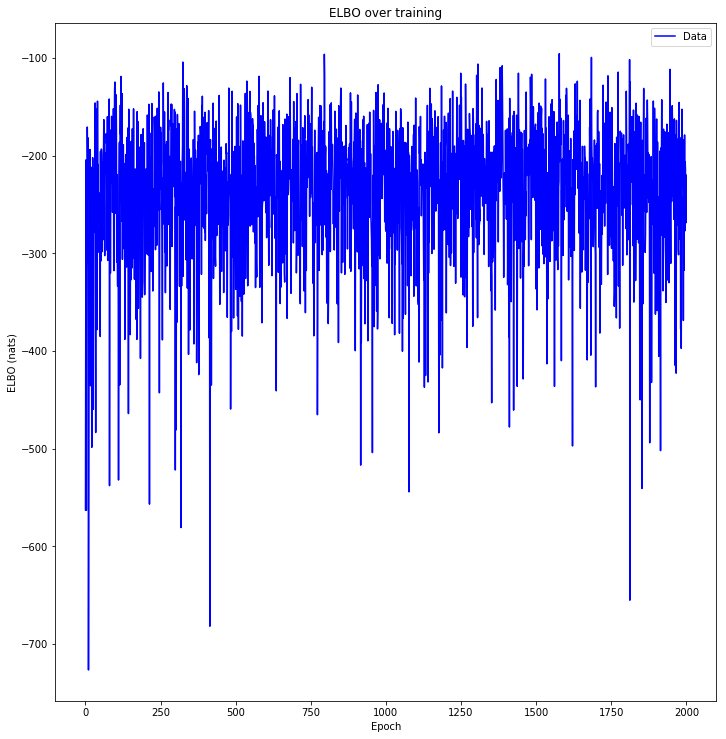

In [12]:
utils.plot_evidence_bounds(elbos)

In [13]:
ssm_smc = mcmc.reduce_resample_move_smc(ssm.SsmStep(batch_shape=particle_shape), lambda: range(50), initializer=init_ssm_proposal, moves=10)

In [14]:
_, inference, _ = ssm_smc(data=data)

In [15]:
for t in range(0, zs.shape[0]-1):
    key = generative.find(lambda k, v: str(t) in k and 'Deterministic' not in k)[0]
    z_t = 'Z_%d' % (t+1)
    accuracy = ((inference[key][z_t].value - utils.optional_to(generative[key][z_t], inference[key][z_t].value))**2).mean()
    print('SMC MSE at time %d: %f' % (t, accuracy))

SMC MSE at time 0: 0.877114
SMC MSE at time 1: 0.634799
SMC MSE at time 2: 0.809490
SMC MSE at time 3: 1.225023
SMC MSE at time 4: 1.675281
SMC MSE at time 5: 0.801661
SMC MSE at time 6: 1.564931
SMC MSE at time 7: 1.407393
SMC MSE at time 8: 0.689867
SMC MSE at time 9: 2.672713
SMC MSE at time 10: 4.475504
SMC MSE at time 11: 0.798717
SMC MSE at time 12: 1.271527
SMC MSE at time 13: 1.756158
SMC MSE at time 14: 0.826696
SMC MSE at time 15: 2.937446
SMC MSE at time 16: 0.539486
SMC MSE at time 17: 0.706174
SMC MSE at time 18: 0.611421
SMC MSE at time 19: 5.536809
SMC MSE at time 20: 4.573176
SMC MSE at time 21: 2.832546
SMC MSE at time 22: 1.368388
SMC MSE at time 23: 1.846298
SMC MSE at time 24: 0.679370
SMC MSE at time 25: 4.046370
SMC MSE at time 26: 0.752960
SMC MSE at time 27: 1.859647
SMC MSE at time 28: 1.079517
SMC MSE at time 29: 0.734577
SMC MSE at time 30: 0.457735
SMC MSE at time 31: 0.717664
SMC MSE at time 32: 0.676983
SMC MSE at time 33: 0.906226
SMC MSE at time 34: 0.85

In [16]:
init_ssm_params

"{'delta__loc': 'tensor(0.9444, grad_fn=<CloneBackward>)', 'delta__scale': 'tensor(0.6830, grad_fn=<CloneBackward>)', 'mu__loc': 'tensor(-0.7045, grad_fn=<CloneBackward>)', 'mu__scale': 'tensor(0.9597, grad_fn=<CloneBackward>)', 'sigma__loc': 'tensor(0.3669, grad_fn=<CloneBackward>)', 'sigma__scale': 'tensor(0.7496, grad_fn=<CloneBackward>)'}"